In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Read Data


In [2]:
import pandas as pd
df =  pd.read_excel('/content/drive/MyDrive/Bank_Personal_Loan_Modelling.xlsx')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#Preprocessing

In [4]:
negative_experience = df['Experience'] < 0
any_negative_experience = negative_experience.any()

any_negative_experience

True

In [5]:
df['Experience'] = df['Experience'].abs()
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
nan_count = df.isna().sum()
nan_count

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["Age", "Experience", "Income", "CCAvg", "Mortgage"]] = scaler.fit_transform(df[["Age", "Experience", "Income", "CCAvg", "Mortgage"]])

df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,0.045455,0.023256,0.189815,91107,4,0.16,1,0.0,0,1,0,0,0
1,2,0.500000,0.441860,0.120370,90089,3,0.15,1,0.0,0,1,0,0,0
2,3,0.363636,0.348837,0.013889,94720,1,0.10,1,0.0,0,0,0,0,0
3,4,0.272727,0.209302,0.425926,94112,1,0.27,2,0.0,0,0,0,0,0
4,5,0.272727,0.186047,0.171296,91330,4,0.10,2,0.0,0,0,0,0,1


In [8]:
df['ZIP Code'].value_counts()

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: count, Length: 467, dtype: int64

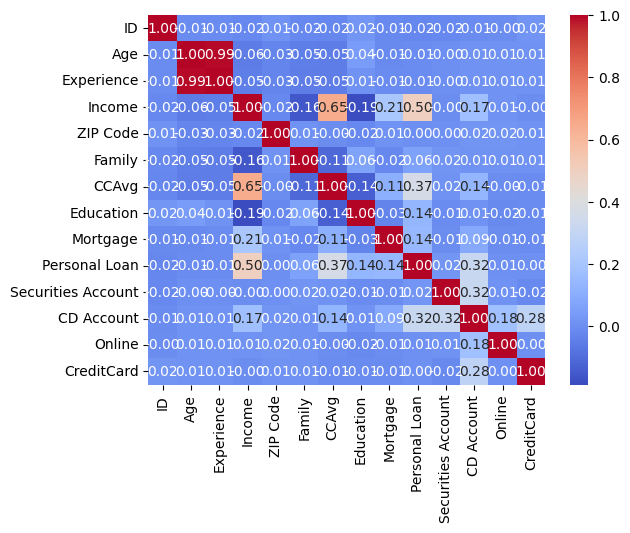

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()


In [10]:
df.drop(['ID', 'Age', 'Experience','ZIP Code'], axis=1, inplace=True)
df.head()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.189815,4,0.16,1,0.0,0,1,0,0,0
1,0.120370,3,0.15,1,0.0,0,1,0,0,0
2,0.013889,1,0.10,1,0.0,0,0,0,0,0
3,0.425926,1,0.27,2,0.0,0,0,0,0,0
4,0.171296,4,0.10,2,0.0,0,0,0,0,1


#Models


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Personal Loan', axis=1), df['Personal Loan'], test_size=0.3, random_state=0)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (3500, 9)
y_train shape: (3500,)
X_test shape: (1500, 9)
y_test shape: (1500,)


#Using scikit-learn


In [14]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
mlp_model.fit(X_train, y_train)

mlp_accuracy = mlp_model.score(X_test, y_test)

print('MLP Neural Network accuracy:', mlp_accuracy)


MLP Neural Network accuracy: 0.9833333333333333


#Using TensorFlow

In [13]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

accuracy = model.evaluate(X_test, y_test)[1]

print('TensorFlow Neural Network accuracy:', accuracy)

Epoch 1/100
110/110 [==============================] - 1s 3ms/step - loss: 0.4197 - accuracy: 0.8543
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.8997
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.9029
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2342 - accuracy: 0.9134
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9249
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9317
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.9420
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1490 - accuracy: 0.9454
Epoch 9/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1356 - accuracy: 0.9509
Epoch 10/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1255 - accura